# Descision Tree Example

In [29]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [30]:
# load the dataset titanic
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
# drop deck column
df.drop(['deck'], axis=1, inplace=True)

# impute missing values of age and fare using median
imputer = SimpleImputer(strategy='median')
df[['age','fare']] = imputer.fit_transform(df[['age','fare']])

# impute missing values of embarked and embark_town using mode
imputer = SimpleImputer(strategy='most_frequent')
df[['embarked','embark_town']] = imputer.fit_transform(df[['embarked','embark_town']])



In [32]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [33]:
# encode the categorical and object columns
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = label_encoder.fit_transform(df[col])
        
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [34]:
# split the data into features and target
X = df.drop(['survived','alive'], axis=1)
y = df['survived']

In [35]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# create the model
model = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)

# fit the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

In [37]:
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[105   0]
 [  0  74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [38]:
# save the model
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='./Save_models/Decision_tree_01.dot', feature_names=X.columns, filled=True)

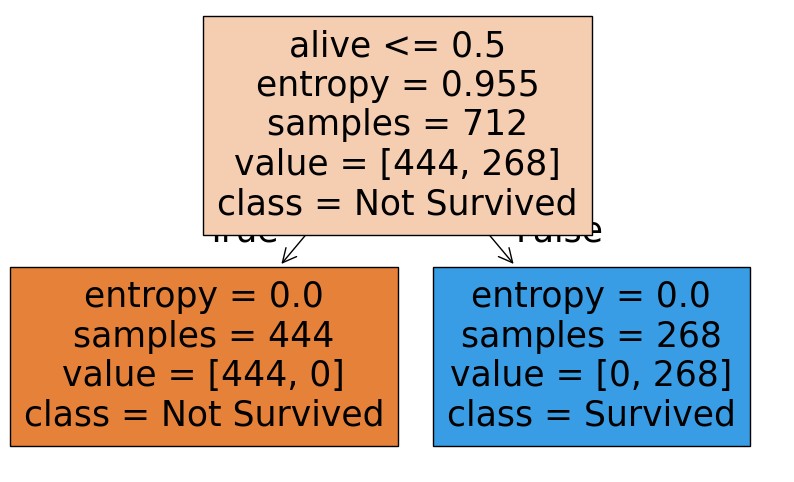

In [39]:
# plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10,6))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Survived','Survived'])
plt.show()